In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = sns.load_dataset("titanic")

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


=> 'age' has only 714 non-null values (177 missing), 'embarked' and 'embark_town' have 889 (2 missing), and 'deck' has only 203 (688 missing)

Univariate Analysis

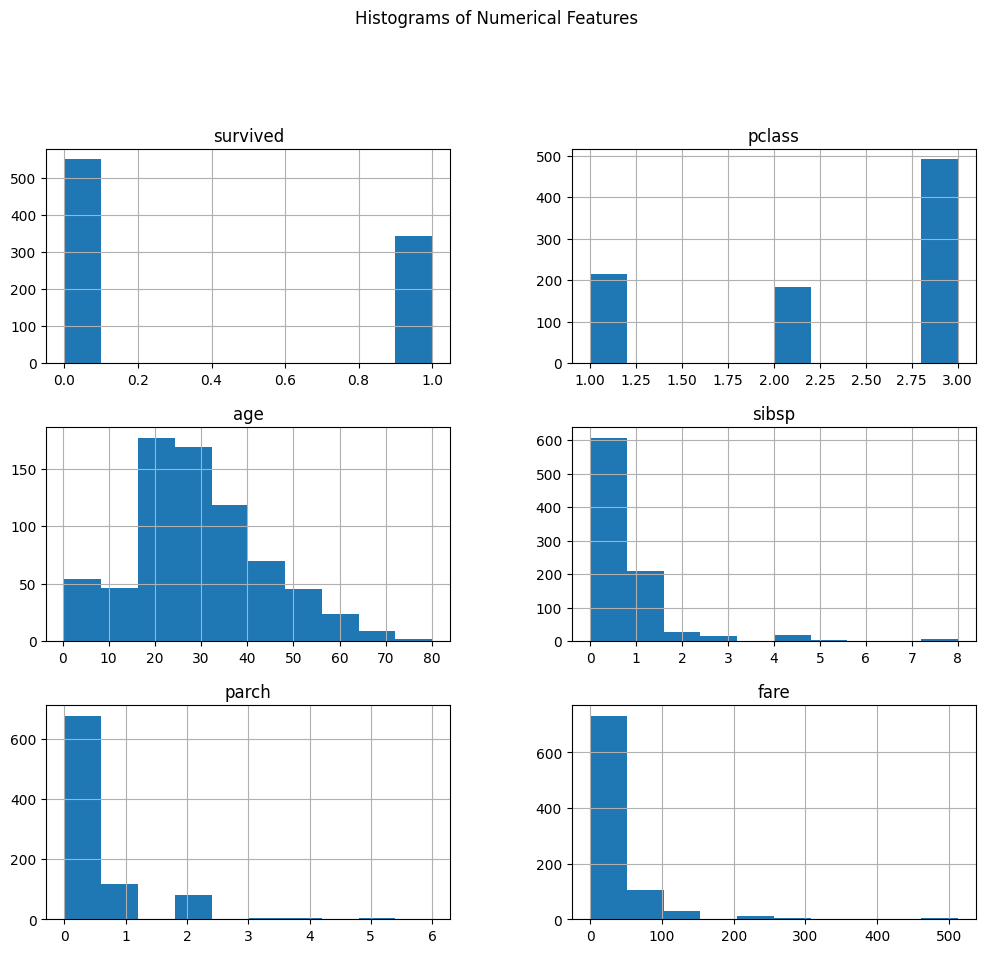

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
df[numerical_features].hist(figsize=(12, 10))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

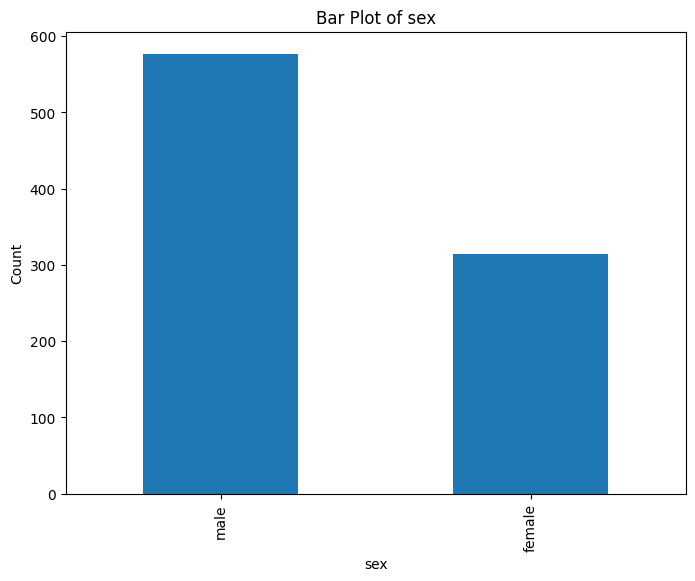

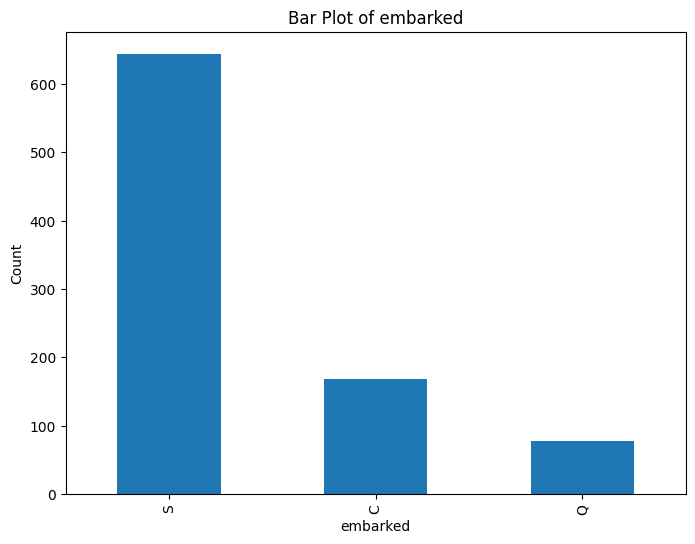

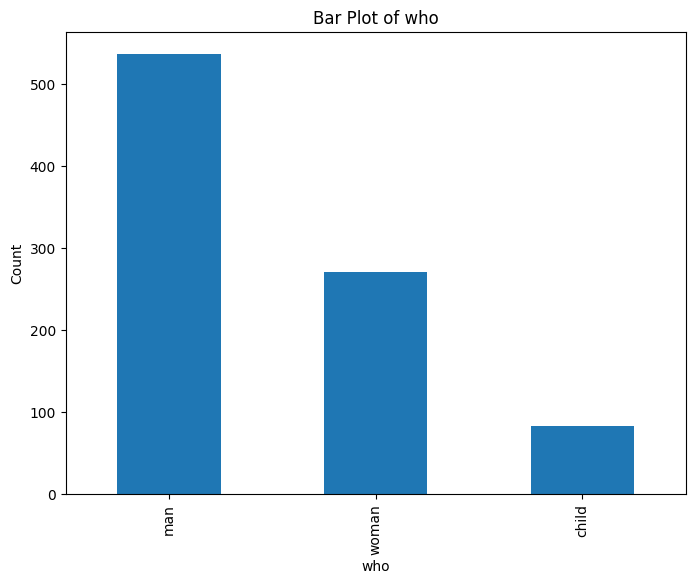

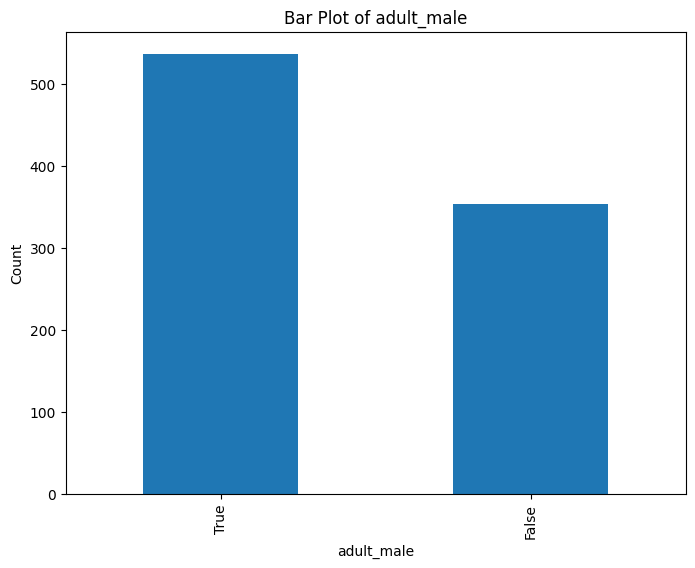

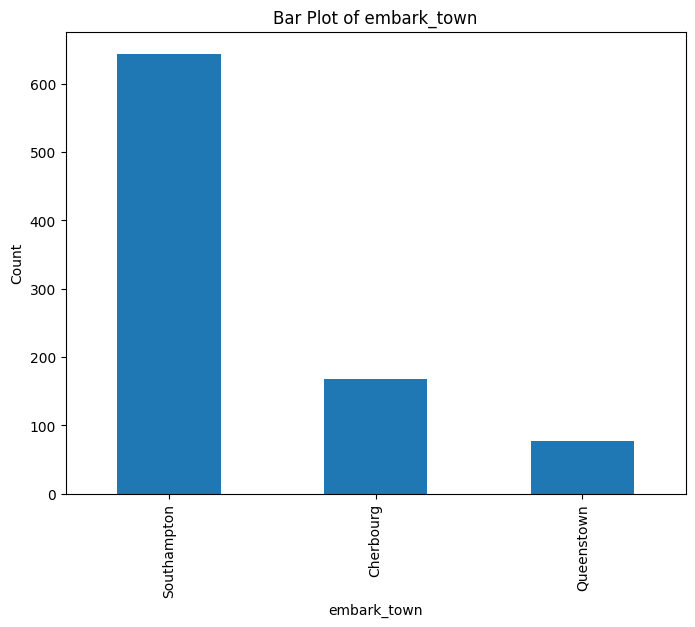

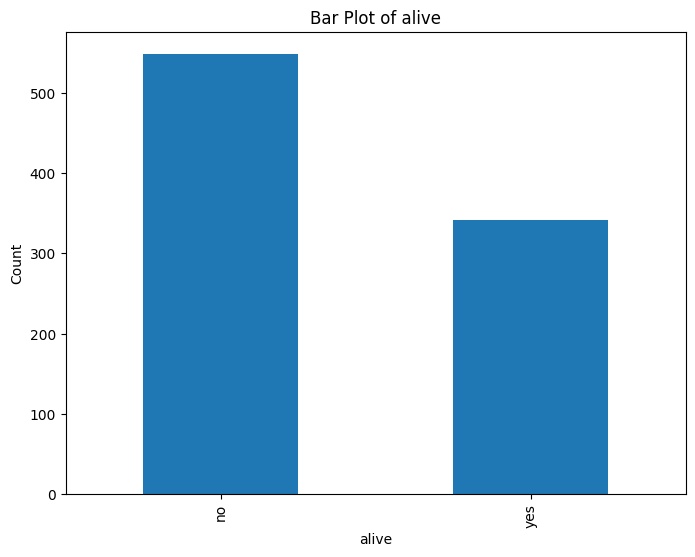

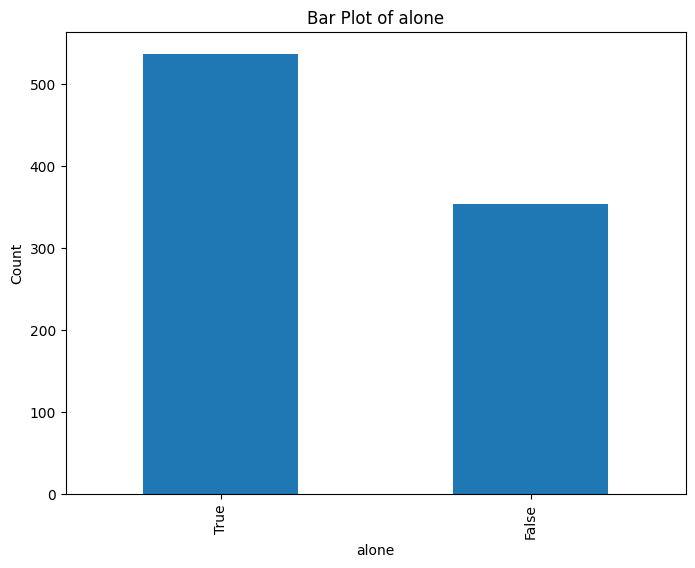

In [ ]:
categorical_features = df.select_dtypes(include=['object', 'bool']).columns
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
print("\n")

Bivariate Analysis

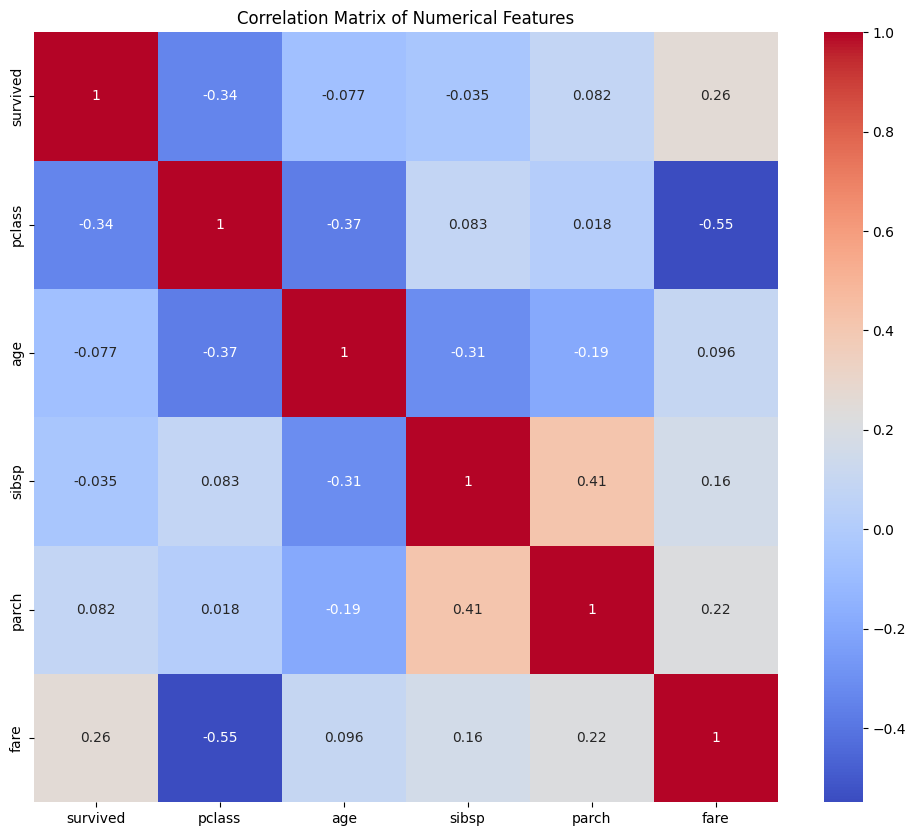

In [ ]:
numerical_features = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

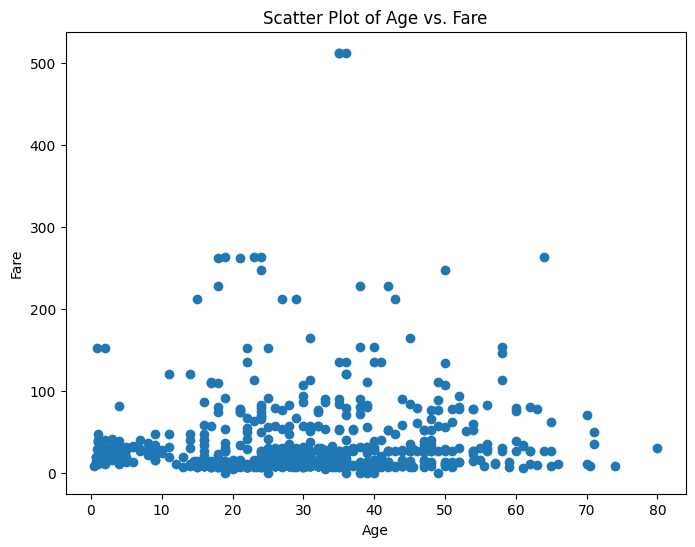

In [ ]:
# Scatter plot: Age vs. Fare
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['fare'])
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

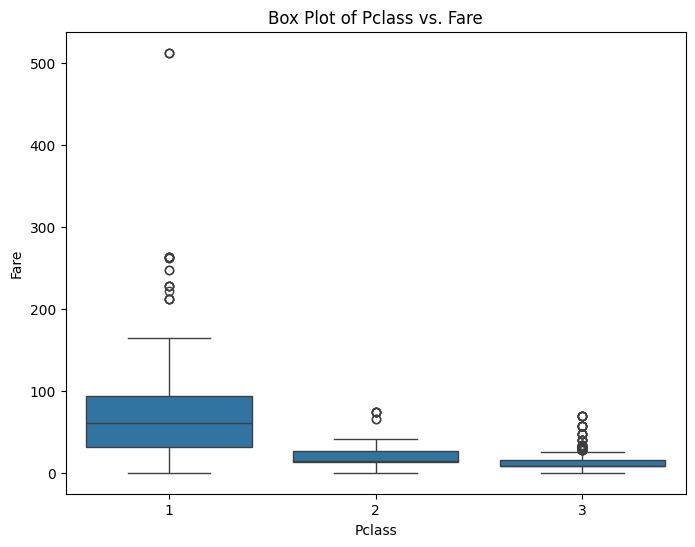

In [ ]:
# Box plots: Pclass vs. Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Box Plot of Pclass vs. Fare')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

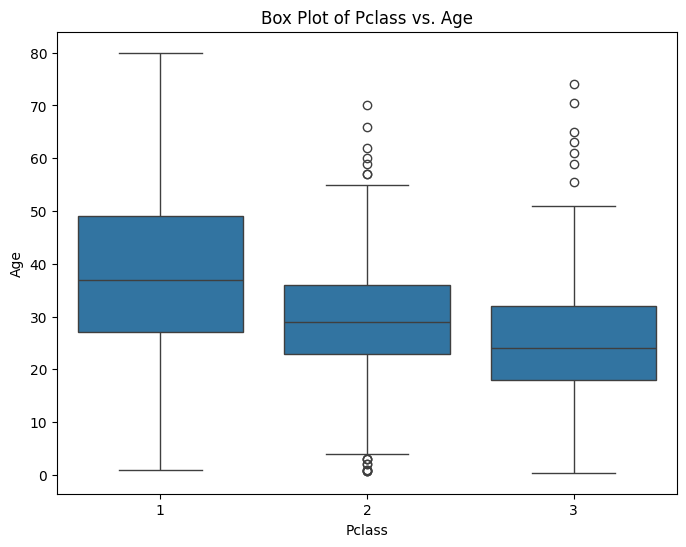

In [ ]:
# Box plots: Pclass vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Box Plot of Pclass vs. Age')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

Data Cleaning and Transformation

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True) #less sensitive to outliers comparing with mean

<ipython-input-14-acc0ebd74510>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True) #less sensitive to outliers comparing with mean


In [ ]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

<ipython-input-15-efdb2d74d67e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [ ]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

<ipython-input-16-d05d3a77059a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [ ]:
df.drop(columns=['deck'], inplace=True) #many rows in deck is missing. if we fill in with mean/median, it will impact the result (bias?)

In [ ]:
df.duplicated().sum()

np.int64(116)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(775, 14)

In [ ]:
#re-check
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


 Analyzing the Target Variable - 'Survived'

In [ ]:
print("\nDistribution of the 'Survived' variable:")
print(df['survived'].value_counts())
print("\nPercentage of survivors:")
print(df['survived'].value_counts(normalize=True) * 100)


Distribution of the 'Survived' variable:
survived
0    455
1    320
Name: count, dtype: int64

Percentage of survivors:
survived
0    58.709677
1    41.290323
Name: proportion, dtype: float64


We can see the raw counts of passengers who survived (1) and those who didn't (0)

=> More than 58% of people didn't survided

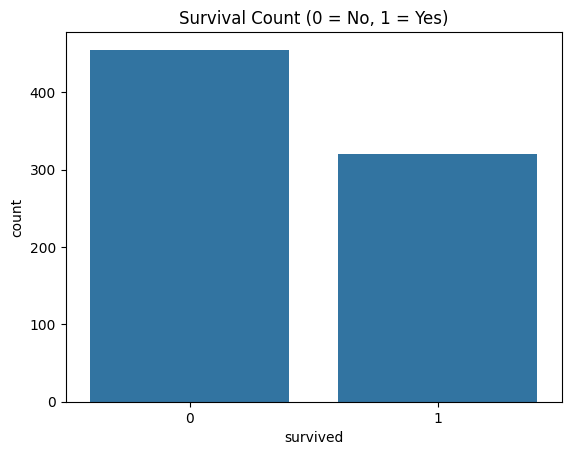

In [ ]:
sns.countplot(data=df, x='survived')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

Examining Numerical Features

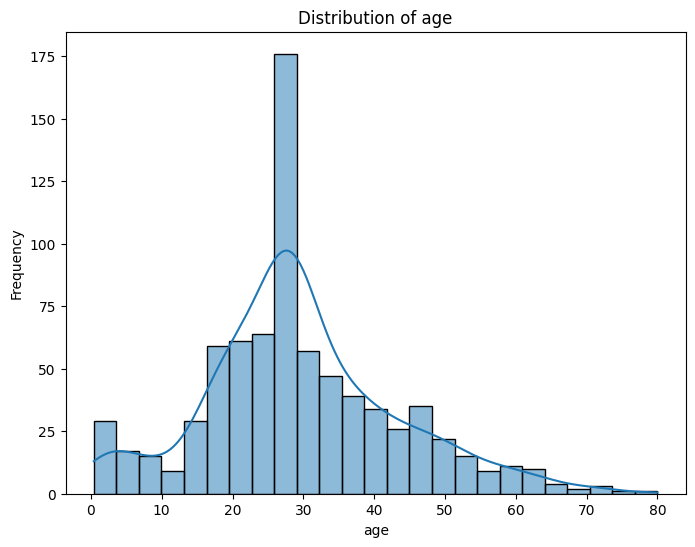

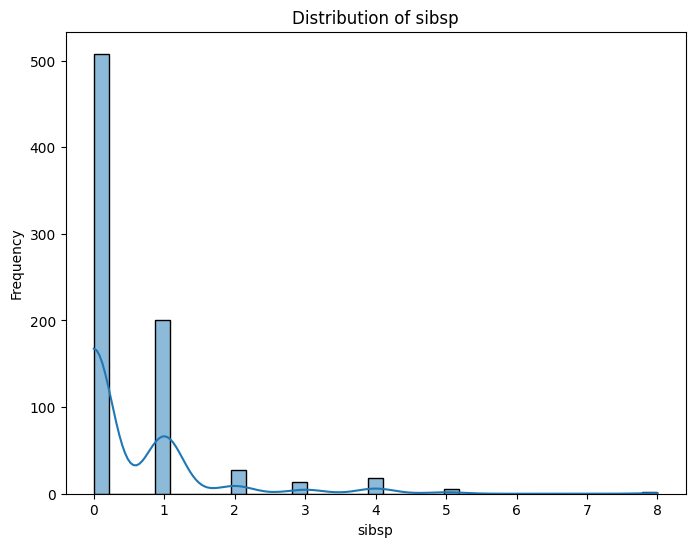

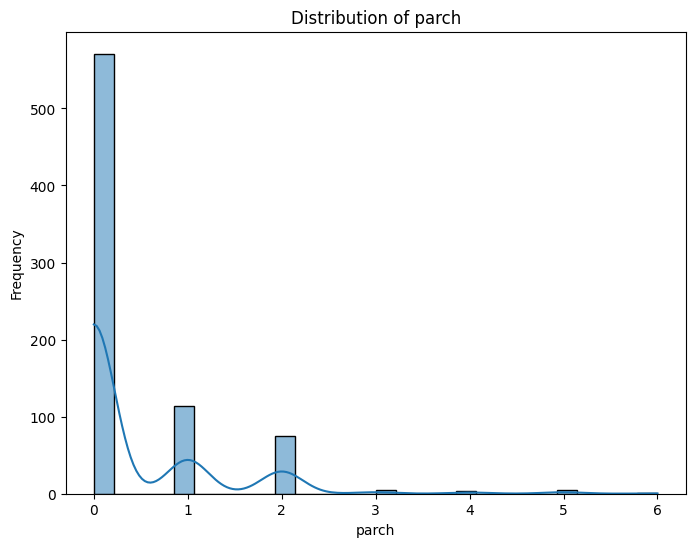

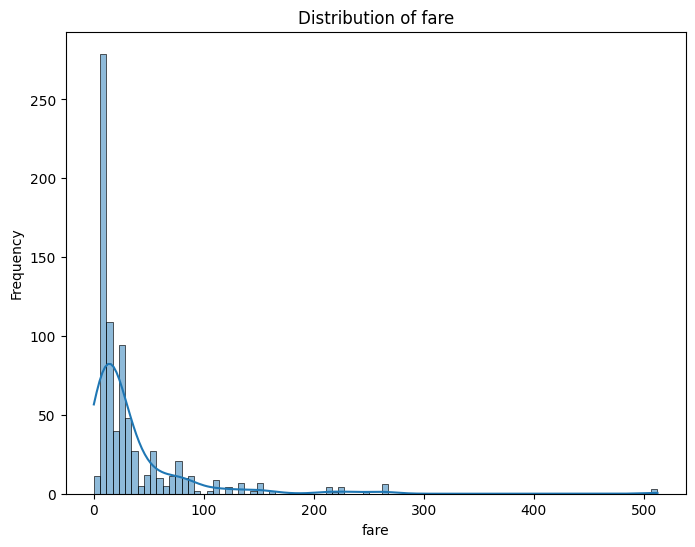

In [ ]:
numerical_features = ['age', 'sibsp', 'parch', 'fare']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

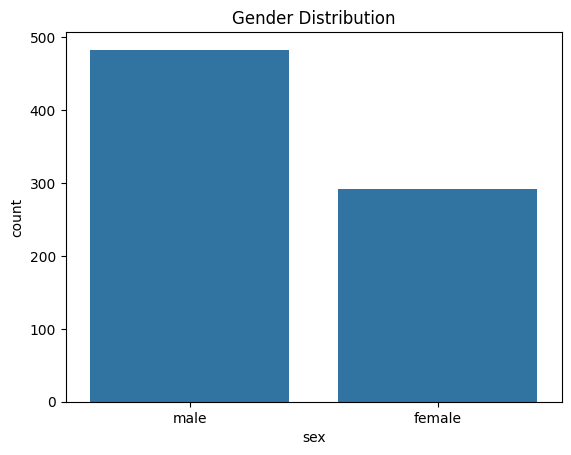

In [ ]:
sns.countplot(data=df, x='sex')
plt.title('Gender Distribution')
plt.show()

=> imbalance gender distribution

Bivariate Analysis

See how different features relate to the target (survived).

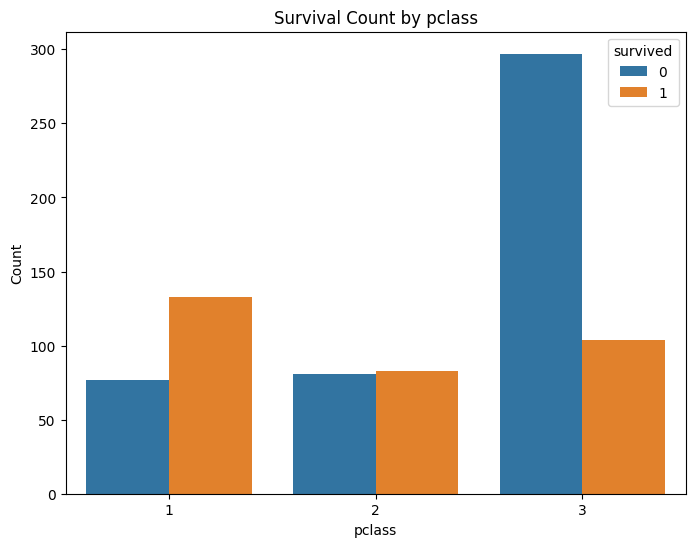


Survival rate by pclass:
pclass
1    63.333333
2    50.609756
3    25.935162
Name: survived, dtype: float64


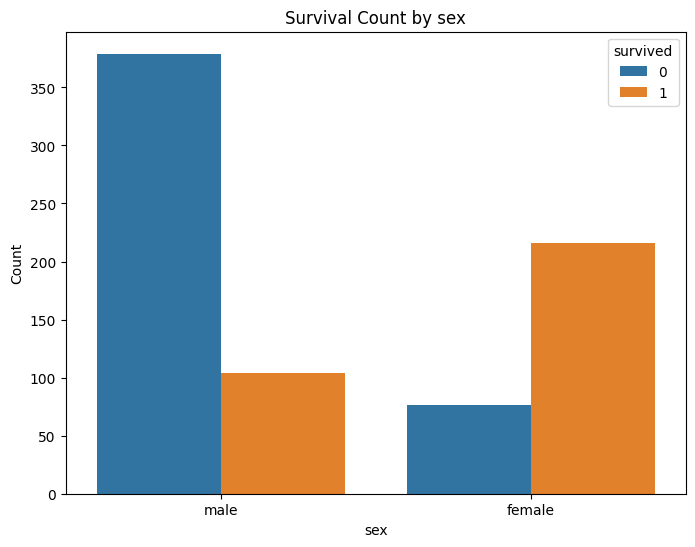


Survival rate by sex:
sex
female    73.972603
male      21.532091
Name: survived, dtype: float64


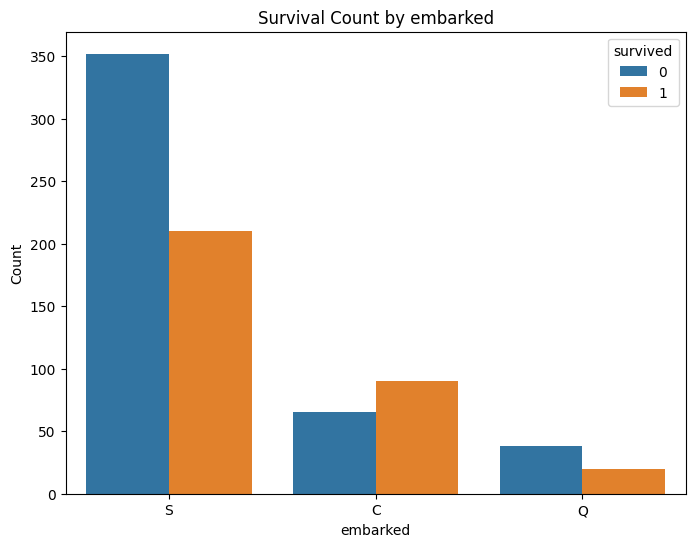


Survival rate by embarked:
embarked
C    58.064516
Q    34.482759
S    37.366548
Name: survived, dtype: float64


In [ ]:
categorical_features = ['pclass', 'sex', 'embarked']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='survived', data=df)
    plt.title(f'Survival Count by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

    print(f"\nSurvival rate by {feature}:")
    print(df.groupby(feature)['survived'].mean() * 100)

Exploring Relationships Between Categorical Features

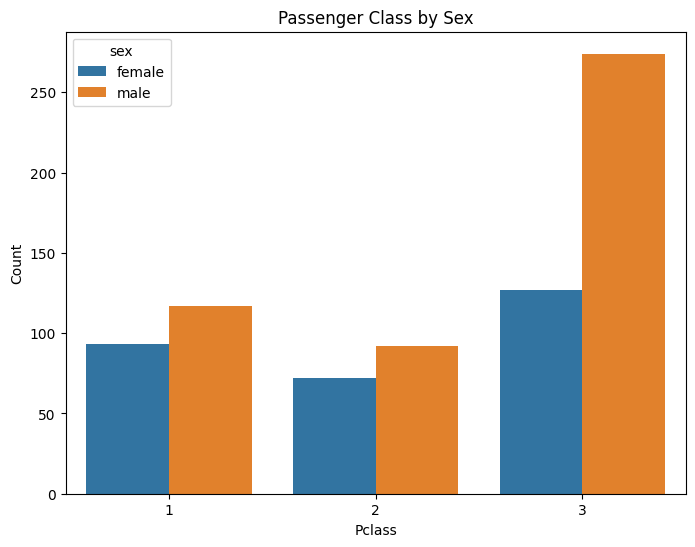

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='sex', data=df)
plt.title('Passenger Class by Sex')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

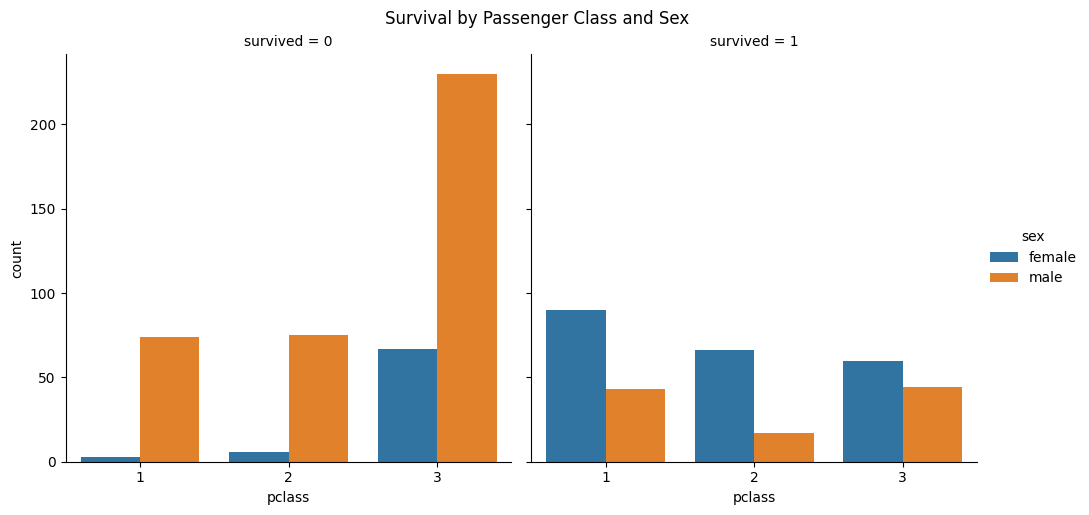

In [ ]:
plt.figure(figsize=(10, 6))
sns.catplot(x='pclass', hue='sex', col='survived', data=df, kind='count')
plt.suptitle('Survival by Passenger Class and Sex', y=1.02)
plt.show()

In [ ]:
df = df.drop(columns =['embark_town', 'alive', 'class', 'who']) #remove features: alive, class, and who => redundant

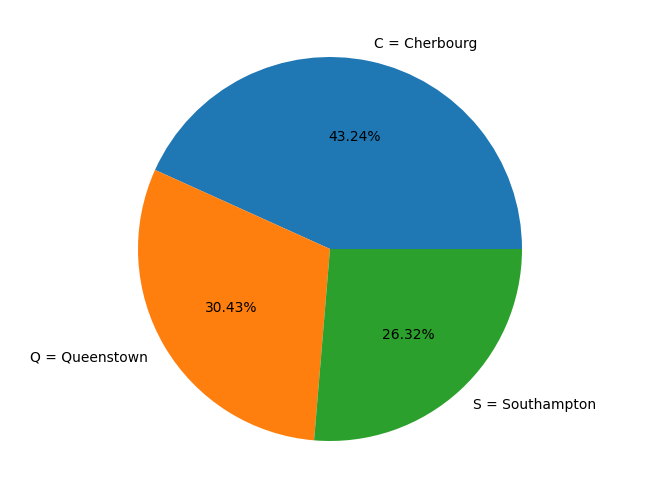

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

=> we can see the dominance of Cherbourg

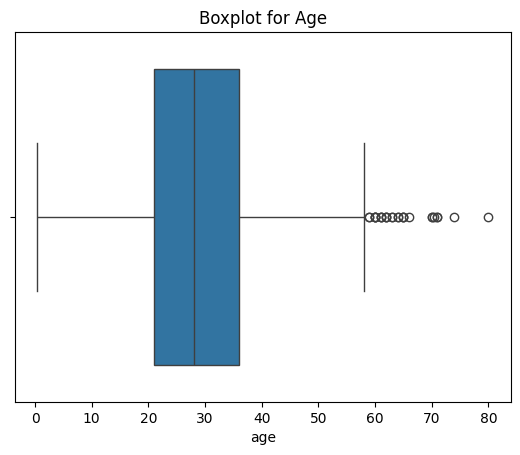

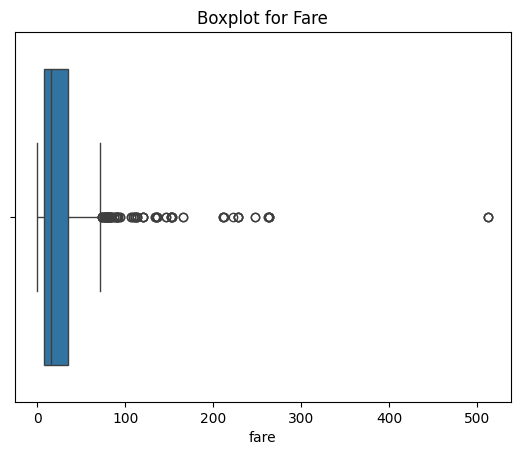

In [ ]:
sns.boxplot(x=df['age'])
plt.title("Boxplot for Age")
plt.show()

sns.boxplot(x=df['fare'])
plt.title("Boxplot for Fare")
plt.show()

=> "age" and "fare" have some outliers

Categorical Encoding

In [ ]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1}).astype(int)

In [ ]:
df = pd.get_dummies(df, columns=['embarked'])

In [ ]:
label_cols = ['adult_male', 'alone']
for col in label_cols:
    if df[col].dtype == 'bool':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,embarked_S
0,0,3,0,22.0,1,0,7.2500,1,0,False,False,True
1,1,1,1,38.0,1,0,71.2833,0,0,True,False,False
2,1,3,1,26.0,0,0,7.9250,0,1,False,False,True
3,1,1,1,35.0,1,0,53.1000,0,0,False,False,True
4,0,3,0,35.0,0,0,8.0500,1,1,False,False,True


Outlier Handling

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_filtered = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df_filtered

df = remove_outliers_iqr(df, 'fare')
df = remove_outliers_iqr(df, 'age')

Feature Scaling

In [ ]:
numerical_cols_to_scale = ['age', 'fare', 'sibsp', 'parch']
scaler = RobustScaler()
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

In [ ]:
# Define target and features
X = df.drop(columns=['survived'])
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=19)

In [ ]:
y_train.head()

,survived
552,0
487,0
122,0
580,1
80,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
log_reg = LogisticRegression(random_state=19, max_iter=1000)
dt_clf = DecisionTreeClassifier(random_state=19)
knn_clf = KNeighborsClassifier()

In [ ]:
models = [
    ('Logistic Regression', log_reg),
    ('Decision Tree', dt_clf),
    ('K-Nearest Neighbors', knn_clf),
]

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

cv_results = {}
cv_mean_scores = {}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=19)

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_results[name] = scores
    cv_mean_scores[name] = scores.mean()
    print(f"{name}: Mean Accuracy = {scores.mean():.4f} (Std Dev = {scores.std():.4f})")

Logistic Regression: Mean Accuracy = 0.7827 (Std Dev = 0.0489)
Decision Tree: Mean Accuracy = 0.7346 (Std Dev = 0.0232)
K-Nearest Neighbors: Mean Accuracy = 0.7481 (Std Dev = 0.0261)


=> Logistic Regression appears to be the best performing model among these three on the training dataset.

In [ ]:
best_model_name = max(cv_mean_scores, key=cv_mean_scores.get)
best_model = [model for name, model in models if name == best_model_name][0]

print(f"\nBest Performing Model based on Cross-Validation Accuracy: {best_model_name} ")


Best Performing Model based on Cross-Validation Accuracy: Logistic Regression 


In [ ]:
best_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=19)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print("\nEvaluation Metrics for Best Model ({}) on Test Data".format(best_model_name))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Precision (Survived=1): {precision:.4f}")
print(f"Recall (Survived=1): {recall:.4f}")
print(f"F1-Score (Survived=1): {f1:.4f}")


Evaluation Metrics for Best Model (Logistic Regression) on Test Data
Accuracy: 0.7786
Precision (Survived=1): 0.7000
Recall (Survived=1): 0.7143
F1-Score (Survived=1): 0.7071


=> The Logistic Regression model demonstrates decent predictive performance on unseen data, correctly classifying nearly 78% of passengers. Its ability to correctly identify actual survivors (recall) is slightly better than its ability to ensure its survival predictions are correct (precision), as indicated by the respective scores and balanced by the F1-score.

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        82
           1       0.70      0.71      0.71        49

    accuracy                           0.78       131
   macro avg       0.76      0.77      0.76       131
weighted avg       0.78      0.78      0.78       131



=> It's significantly better at predicting non-survival (class 0) than survival (class 1).

In [ ]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[67 15]
 [14 35]]


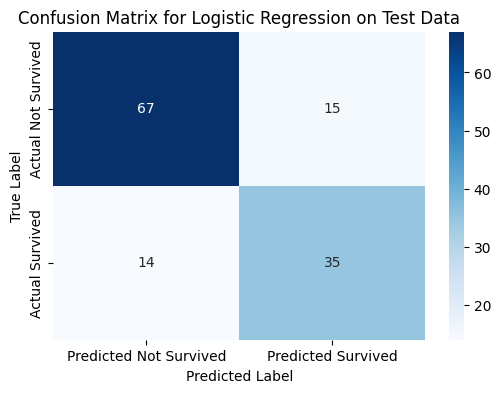

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Not Survived', 'Predicted Survived'],
            yticklabels=['Actual Not Survived', 'Actual Survived'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {best_model_name} on Test Data')
plt.show()